## Step 0 : Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate,cross_val_score,learning_curve,ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [2]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2)

## Step 1 : Load Dataset

In [3]:
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)
features.shape,labels.shape

((20640, 8), (20640,))

## Step 2 : Data Exploration

## Step 3 : Preprocessing and Model Building

In [4]:
train_features, test_features, train_labels,test_labels = train_test_split(features,labels)

In [5]:
lin_reg_pipe=Pipeline([("feature_scaling",StandardScaler()),
                        ("lin_reg",LinearRegression())])
lin_reg_pipe.fit(train_features,train_labels)
lin_reg_pipe[-1].coef_,lin_reg_pipe[-1].intercept_

(array([ 8.21836553e-01,  1.17080226e-01, -2.89366127e-01,  3.24110961e-01,
        -7.13219957e-04, -4.18293138e-02, -8.90640383e-01, -8.67692156e-01]),
 2.0556878514211845)

In [6]:
lin_reg_pipe

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

## Step 4 : Model Evaluation

In [7]:
train_score,test_score=lin_reg_pipe.score(train_features,train_labels),lin_reg_pipe.score(test_features,test_labels)
train_score,test_score

(0.5986279055374162, 0.6269391377249561)

In [8]:
lin_reg_score=cross_val_score(lin_reg_pipe,train_features,train_labels,scoring='neg_mean_squared_error',cv=shuffle_split_cv)
lin_reg_score,lin_reg_score.mean(),lin_reg_score.std()

(array([-0.47721959, -0.47748057, -0.51060462, -0.51909205, -0.50711539,
        -0.55199719, -0.54127502, -0.54907424, -0.55417572, -0.55518762]),
 -0.5243222016906017,
 0.029041811637497434)

In [10]:
lin_reg_cv_results=cross_validate(lin_reg_pipe,train_features,train_labels,scoring='neg_mean_squared_error',
                                    cv=shuffle_split_cv,return_estimator=True,return_train_score=True)
train_error,test_error=lin_reg_cv_results['train_score'],lin_reg_cv_results['test_score']
lin_reg_cv_results

{'fit_time': array([0.00595951, 0.00397348, 0.00397229, 0.00397515, 0.00496674,
        0.00446963, 0.00446987, 0.00446916, 0.0059607 , 0.00447011]),
 'score_time': array([0.00099397, 0.00099349, 0.00099325, 0.00099206, 0.00149012,
        0.00099373, 0.00099349, 0.00149035, 0.00099158, 0.00099325]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

In [12]:
best_model_index=np.argmin(test_error)
selected_model=lin_reg_cv_results['estimator'][best_model_index]
selected_model['lin_reg'].intercept_,selected_model['lin_reg'].coef_

(2.0474176719961217,
 array([ 0.83403186,  0.11306557, -0.30634312,  0.3497497 ,  0.00435311,
        -0.04940805, -0.90410699, -0.88438937]))

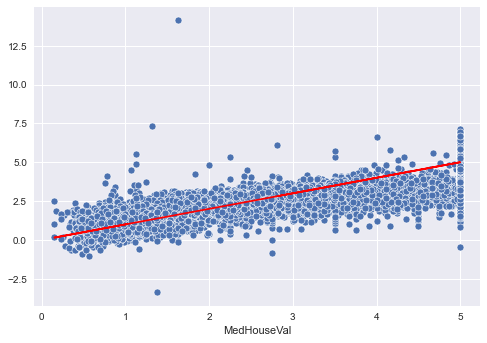

In [14]:
from sklearn.model_selection import cross_val_predict
cv_preds=cross_val_predict(lin_reg_pipe,train_features,train_labels)
mse_cv=mean_squared_error(train_labels,cv_preds)
sns.scatterplot(train_labels,cv_preds)
plt.plot(train_labels,train_labels,'r-')

## Step 5 : Predictions

In [15]:
test_preds_cv=selected_model.predict(test_features)
test_preds_cv[:5]

array([1.65692312, 1.51018955, 1.7628295 , 3.06257965, 2.8699752 ])

In [16]:
test_pred=lin_reg_pipe.predict(test_features)
test_pred[:5]

array([1.67288722, 1.52923266, 1.78035427, 3.07233013, 2.88487663])

## Step 5 : Report Model Performance

In [17]:
score_cv=selected_model.score(test_features,test_labels)
score=lin_reg_pipe.score(test_features,test_labels)
score_cv,score

(0.6264051014803931, 0.6269391377249561)